## US weather event

Classify the serverity of different weather events


In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/US_WeatherEvents_2016-2019.csv"
rawWeather = pd.read_csv(path)

In [5]:
rawWeather.head(2)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [6]:
rawWeather.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'TimeZone', 'AirportCode', 'LocationLat', 'LocationLng', 'City',
       'County', 'State', 'ZipCode'],
      dtype='object')

In [0]:
# rawWeather.drop(["EventId"],inplace=True,axis=1)
rawWeather.drop(["EventId","StartTime(UTC)","EndTime(UTC)"],inplace=True,axis=1)

In [0]:
# select start time and end time to calculate the duration 
# then add another series back to rawWeather

In [9]:
rawWeather.head(2)

,Type,Severity,TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,Snow,Light,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,Snow,Light,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [0]:
rawWeather.dropna(inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# encoder.fit_transform(rawWeather)

col_type = encoder.fit_transform(rawWeather["Type"])
col_timez = encoder.fit_transform(rawWeather["TimeZone"])
col_airport = encoder.fit_transform(rawWeather["AirportCode"])
col_lat = encoder.fit_transform(rawWeather["LocationLat"])
col_long = encoder.fit_transform(rawWeather["LocationLng"])
col_city = encoder.fit_transform(rawWeather["City"])
col_county = encoder.fit_transform(rawWeather["County"])
col_state = encoder.fit_transform(rawWeather["State"])
col_zip = encoder.fit_transform(rawWeather["ZipCode"])
col_Severity = encoder.fit_transform(rawWeather["Severity"])

In [12]:
type(col_Severity)

numpy.ndarray

In [0]:
npFeatures = list(zip(col_type,col_timez,col_airport,col_lat,col_long,col_city,col_county,col_state,col_zip))

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(npFeatures) 

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaledFeatures,col_Severity,test_size=0.25,shuffle=True)

# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(npFeatures,col_Severity,test_size=0.25,shuffle=True)

In [16]:
np.unique(rawWeather.Severity.tolist())

array(['Heavy', 'Light', 'Moderate', 'Other', 'Severe', 'UNK'],
      dtype='<U8')

In [17]:
np.unique(rawWeather.Type.tolist())

array(['Cold', 'Fog', 'Hail', 'Precipitation', 'Rain', 'Snow', 'Storm'],
      dtype='<U13')

In [18]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


********************************************
gaussian naive bayes testing accuracy: 0.7999079095059536
********************************************


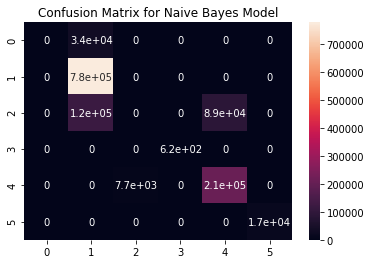

In [19]:
# Default Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y1_t = nb.predict(x_test)
print("********************************************")
print("gaussian naive bayes testing accuracy: " + str(accuracy_score(y_test,y1_t)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y1_t),annot=True)
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

********************************************
Decision Tree accuracy, using gini & splitted by best(Default): 0.8209556858312084
********************************************


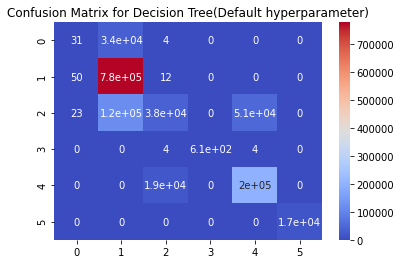

In [20]:
from sklearn.tree import DecisionTreeClassifier
# default
dt1 = DecisionTreeClassifier(criterion = "gini",splitter = "best")
dt1.fit(x_train,y_train)
y2_t_a = dt1.predict(x_test)
print("********************************************")
print("Decision Tree accuracy, using gini & splitted by best(Default): " + str(accuracy_score(y_test,y2_t_a)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_a),annot=True,cmap="coolwarm")
plt.title("Confusion Matrix for Decision Tree(Default hyperparameter)")
plt.show()

********************************************
Decision Tree Accuracy, entropy & splitted by best: 0.8209628555063503
********************************************


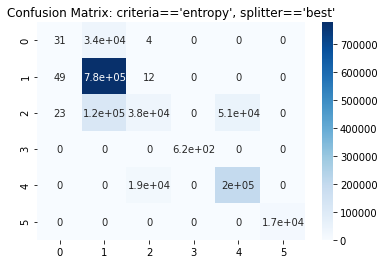

In [21]:
# tune hyperparamter ex1
dt2 = DecisionTreeClassifier(criterion = "entropy",splitter = "best")
dt2.fit(x_train,y_train)
y2_t_b = dt2.predict(x_test)
print("********************************************")
print("Decision Tree Accuracy, entropy & splitted by best: " + str(accuracy_score(y_test,y2_t_b)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_b),annot=True,cmap="Blues")
plt.title("Confusion Matrix: criteria=='entropy', splitter=='best'")
plt.show()

********************************************
Decision Tree Accuracy, entropy & splitted by random: 0.8209636521369217
********************************************


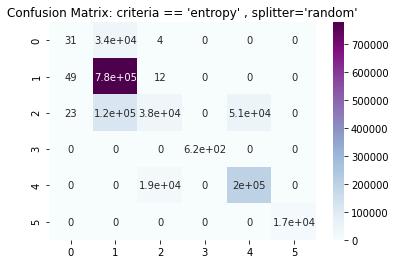

In [22]:
# tune hyperparameter ex2
dt3 = DecisionTreeClassifier(criterion = "entropy",splitter = "random")
dt3.fit(x_train,y_train)
y2_t_c = dt3.predict(x_test)
print("********************************************")
print("Decision Tree Accuracy, entropy & splitted by random: " + str(accuracy_score(y_test,y2_t_c)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_c),annot=True,cmap="BuPu")
plt.title("Confusion Matrix: criteria == 'entropy' , splitter='random'")
plt.show()

********************************************
Decision Tree accuracy, max_depth == 10: 0.8209636521369217
********************************************


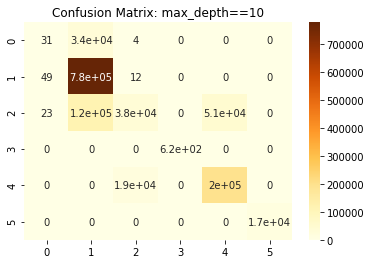

In [23]:
# tune hyperparameter ex3
dt4 = DecisionTreeClassifier(max_depth = 10)
dt4.fit(x_train,y_train)
y2_t_d = dt3.predict(x_test)
print("********************************************")
print("Decision Tree accuracy, max_depth == 10: " + str(accuracy_score(y_test,y2_t_d)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_d),annot=True,cmap="YlOrBr")
plt.title("Confusion Matrix: max_depth==10")
plt.show()

********************************************
Decision Tree accuracy,max depth==5 and max_feature=='log2': 0.7939554858769349
********************************************


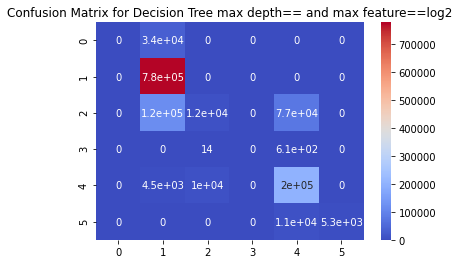

In [24]:
# tune hyperparameter ex4
dt4 = DecisionTreeClassifier(max_depth = 5, max_features = "log2")
dt4.fit(x_train,y_train)
y2_t_e = dt4.predict(x_test)
print("********************************************")
print("Decision Tree accuracy,max depth==5 and max_feature=='log2': " + str(accuracy_score(y_test,y2_t_e)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_e),annot=True,cmap="coolwarm")
plt.title("Confusion Matrix for Decision Tree max depth== and max feature==log2")
plt.show()

********************************************
Decision Tree accuracy,max_depth== 5 and max_feature==sqrt: 0.8209628555063503
********************************************


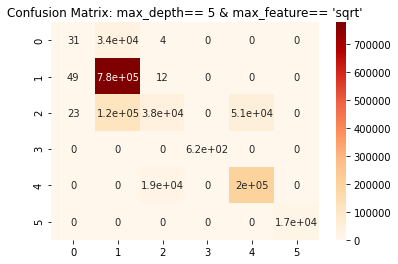

In [25]:
# tune hyperparameter ex5
dt5 = DecisionTreeClassifier(max_depth = 5, max_features = "sqrt")
dt5.fit(x_train,y_train)
y2_t_f = dt5.predict(x_test)
print("********************************************")
print("Decision Tree accuracy,max_depth== 5 and max_feature==sqrt: " + str(accuracy_score(y_test,y2_t_b)))
print("********************************************")
sns.heatmap(confusion_matrix(y_test,y2_t_b),annot=True,cmap="OrRd")
plt.title("Confusion Matrix: max_depth== 5 & max_feature== 'sqrt'")
plt.show()

***********************************************************************
LDA accuracy, Default, using singualr value decomposition 0.7861142511632798
************************************************************************


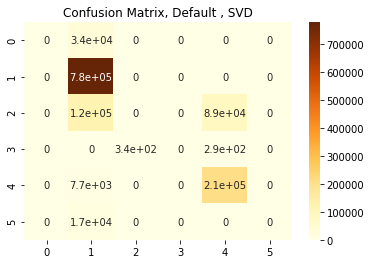

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA1 = LinearDiscriminantAnalysis(solver="svd")
LDA1.fit(x_train,y_train)
y4_t_a = LDA1.predict(x_test)
print("***********************************************************************")
print("LDA accuracy, Default, using singualr value decomposition " + str(accuracy_score(y_test,y4_t_a)))
print("************************************************************************")
sns.heatmap(confusion_matrix(y_test,y4_t_a),annot=True,cmap="YlOrBr")
plt.title("Confusion Matrix, Default , SVD")
plt.show()

*****************************************************************************
LDA accuracy, Least Square && Shinkage(Ledoit Wolf Lemma used) 0.7861142511632798
****************************************************************************


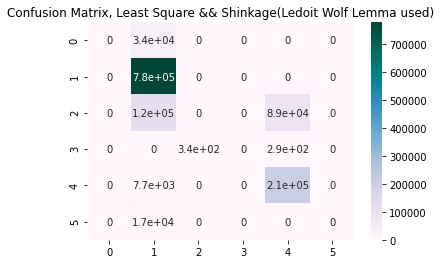

In [27]:
import warnings
warnings.filterwarnings("ignore")
# explore 1: using least square solution, with automatic shrinkage Ledoit Wolf Lemma
LDA2 = LinearDiscriminantAnalysis(solver="lsqr",shrinkage="auto")
LDA2.fit(x_train,y_train)
y4_t_b = LDA2.predict(x_test)
print("*****************************************************************************")
print("LDA accuracy, Least Square && Shinkage(Ledoit Wolf Lemma used) " + str(accuracy_score(y_test,y4_t_b)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y4_t_b),annot=True, cmap="PuBuGn")
plt.title("Confusion Matrix, Least Square && Shinkage(Ledoit Wolf Lemma used)")
plt.show()

*****************************************************************************
LDA accuracy, EigenValue Decomposition && Shinkage: 0.7861142511632798
****************************************************************************


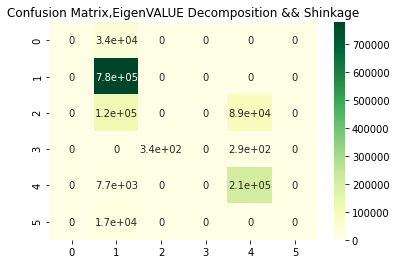

In [28]:
# explore 2; using Eigen Value decomposition, with automatic shrinkage Ledoit Wolf Lemma
LDA3 = LinearDiscriminantAnalysis(solver="eigen",shrinkage="auto")
LDA3.fit(x_train,y_train)
y4_t_c = LDA3.predict(x_test)
print("*****************************************************************************")
print("LDA accuracy, EigenValue Decomposition && Shinkage: " + str(accuracy_score(y_test,y4_t_c)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y4_t_c),annot=True,cmap="YlGn")
plt.title("Confusion Matrix,EigenVALUE Decomposition && Shinkage")
plt.show()

*****************************************************************************
Adaboost accuracy: 0.8060220491409534
****************************************************************************


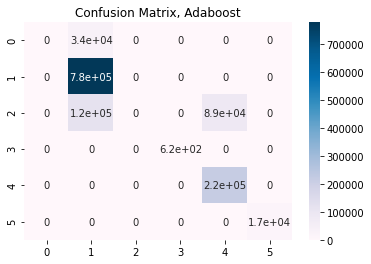

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier() # defaul 50
ada.fit(x_train,y_train)
y5_t = ada.predict(x_test)
print("*****************************************************************************")
print("Adaboost accuracy: " + str(accuracy_score(y_test,y5_t)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y5_t),annot=True,cmap="PuBu")
plt.title("Confusion Matrix, Adaboost")
plt.show()

In [0]:
# from sklearn.svm import LinearSVC
# svm = LinearSVC(penalty="l2")
# svm.fit(x_train,y_train)
# y7_t = svm.predict(x_test)
# print("*****************************************************************************")
# print("SVM accuracy: " + str(accuracy_score(y_test,y7_t)))
# print("****************************************************************************")
# sns.heatmap(confusion_matrix(y_test,y7_t),annot=True,cmap="coolwarm")
# plt.title("Confusion Matrix, Support Vector Machine")
# plt.show()

In [0]:
# from sklearn.ensemble import GradientBoostingClassifier
# GB = GradientBoostingClassifier(loss="deviance",learning_rate=0.15,n_estimators=80,criterion="friedman_mse")
# GB.fit(x_train,y_train)
# y7_t = GB.predict(x_test)
# print("*****************************************************************************")
# print("GradientBoosting accuracy: " + str(accuracy_score(y_test,y7_t)))
# print("****************************************************************************")
# sns.heatmap(confusion_matrix(y_test,y7_t),annot=True,cmap="coolwarm")
# plt.title("Confusion Matrix, GradientBoosting")
# plt.show()

*****************************************************************************
Logistic Regression accuracy: 0.5447200520677742
****************************************************************************


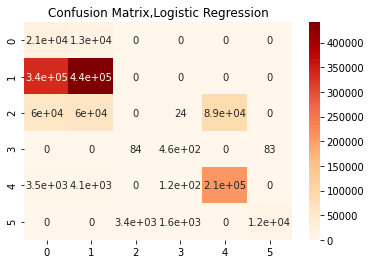

In [34]:
from sklearn.linear_model import LogisticRegressionCV
Log = LogisticRegressionCV(fit_intercept=True,dual=False,penalty="l2",solver="lbfgs",class_weight="balanced")
Log.fit(x_train,y_train)
y8_t = Log.predict(x_test)
print("*****************************************************************************")
print("Logistic Regression accuracy: " + str(accuracy_score(y_test,y8_t)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y8_t),annot=True,cmap="OrRd")
plt.title("Confusion Matrix,Logistic Regression")
plt.show()

*****************************************************************************
Stochastic Grdient Descent accuracy: 0.7861142511632798
****************************************************************************


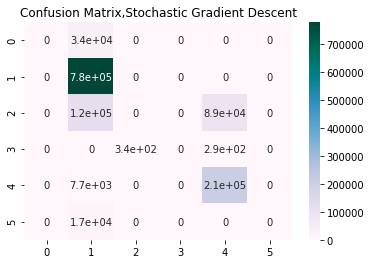

In [35]:
from sklearn.linear_model import SGDClassifier
# tolerance to be 0.005
sgd = SGDClassifier(tol=0.005)
sgd.fit(x_train,y_train)
y3_t = sgd.predict(x_test)
y3_r = sgd.predict(x_train)
print("*****************************************************************************")
print("Stochastic Grdient Descent accuracy: " + str(accuracy_score(y_test,y4_t_b)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y4_t_b),annot=True,cmap="PuBuGn")
plt.title("Confusion Matrix,Stochastic Gradient Descent")
plt.show()

*****************************************************************************
Random Forest accuracy: 0.820976398226063
****************************************************************************


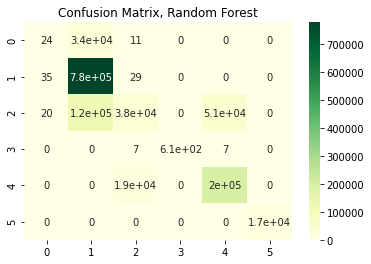

In [36]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators=80,criterion="gini",max_features="auto")
rand.fit(x_train,y_train)
y6_t = rand.predict(x_test)
print("*****************************************************************************")
print("Random Forest accuracy: " + str(accuracy_score(y_test,y6_t)))
print("****************************************************************************")
sns.heatmap(confusion_matrix(y_test,y6_t),annot=True,cmap="YlGn")
plt.title("Confusion Matrix, Random Forest")
plt.show()